Data Cleaning

In [11]:
import pandas as pd

df = pd.read_csv('Stock Market Dataset.csv')

# 1. Clean column names: remove "Unnamed"
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 2. Convert Date → datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# 3. Remove commas from numeric fields & convert to float
def clean_numeric(col):
    return (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .replace('nan', None)
        .astype(float)
    )

for col in df.columns:
    if col != 'Date':
        df[col] = clean_numeric(col)

# 4. Sort by date
df = df.sort_values('Date')

# 5. Reset index
df = df.reset_index(drop=True)

df.head()


,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2019-02-04,2.660,116490.0,54.56,622470.0,2.7975,490.0,3462.8,503920.0,822.50,...,312000.0,310.0,351.34,9050000.0,81.67,98580000.0,169.25,20040000.0,1319.3,159560.0
1,2019-02-05,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950.0,821.35,...,310700.0,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,1319.2,129010.0
2,2019-02-06,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210.0,807.10,...,308810.0,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,1314.4,137250.0
3,2019-02-07,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360.0,800.80,...,302813.0,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,1314.2,166760.0
4,2019-02-08,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230.0,802.20,...,300771.0,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,1318.5,150610.0


In [12]:
df.to_csv('Cleaned_Stock_Market_Dataset.csv', index=False)


Charts & Explaintion

In [13]:
# Load cleaned dataframe from previous step (it's available as df in the environment)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inspect columns to pick price columns
cols = df.columns.tolist()

# Identify likely price columns by suffix '_Price' (case-sensitive)
price_cols = [c for c in cols if c.endswith('_Price')]
price_cols



['Natural_Gas_Price',
 'Crude_oil_Price',
 'Copper_Price',
 'Bitcoin_Price',
 'Platinum_Price',
 'Ethereum_Price',
 'S&P_500_Price',
 'Nasdaq_100_Price',
 'Apple_Price',
 'Tesla_Price',
 'Microsoft_Price',
 'Silver_Price',
 'Google_Price',
 'Nvidia_Price',
 'Berkshire_Price',
 'Netflix_Price',
 'Amazon_Price',
 'Meta_Price',
 'Gold_Price']

In [14]:
# Cell 1: imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from scipy import stats
import os

# Update this path if your cleaned CSV has a different name/location
DATA_PATH = 'Cleaned_Stock_Market_Dataset.csv'  # or '/mnt/data/Stock Market Dataset.csv'

# Load dataset
df = pd.read_csv(DATA_PATH, parse_dates=['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2019-02-04,2.660,116490.0,54.56,622470.0,2.7975,490.0,3462.8,503920.0,822.50,...,312000.0,310.0,351.34,9050000.0,81.67,98580000.0,169.25,20040000.0,1319.3,159560.0
1,2019-02-05,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950.0,821.35,...,310700.0,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,1319.2,129010.0
2,2019-02-06,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210.0,807.10,...,308810.0,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,1314.4,137250.0
3,2019-02-07,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360.0,800.80,...,302813.0,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,1314.2,166760.0
4,2019-02-08,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230.0,802.20,...,300771.0,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,1318.5,150610.0


In [15]:
# Cell 2: detect price columns and basic cleaning check
# We assume price columns end with "_Price" (as in your uploaded dataset)
price_cols = [c for c in df.columns if c.endswith('_Price')]
print("Detected price columns:", price_cols)

# Keep only date + price columns for market analysis
market = df[['Date'] + price_cols].copy()
market.set_index('Date', inplace=True)
market = market.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
market.tail()


Detected price columns: ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price', 'Gold_Price']


C:\Users\Jitesh Jangam\AppData\Local\Temp\ipykernel_26212\2578918728.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market = market.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')


,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
Date,,,,,,,,,,,,,,,,,,,
2024-01-29,2.490,76.78,3.8790,43299.8,938.3,2317.79,4927.93,17596.27,191.73,190.93,409.72,23.134,153.51,624.65,578800.0,575.79,161.26,401.02,2034.9
2024-01-30,2.077,77.82,3.9110,42946.2,931.7,2343.11,4924.97,17476.71,188.04,191.59,408.59,23.225,151.46,627.74,584680.0,562.85,159.00,400.06,2050.9
2024-01-31,2.100,75.85,3.9060,42580.5,932.6,2283.14,4848.87,17137.24,184.40,187.29,397.58,23.169,140.10,615.27,578020.0,564.11,155.20,390.14,2067.4
2024-02-01,2.050,73.82,3.8535,43081.4,922.3,2304.28,4906.19,17344.71,186.86,188.86,403.78,23.236,141.16,630.27,581600.0,567.51,159.28,394.78,2071.1
2024-02-02,2.079,72.28,3.8215,43194.7,901.6,2309.28,4958.61,17642.73,185.85,187.91,411.22,22.796,142.38,661.60,589498.0,564.64,171.81,474.99,2053.7


In [16]:
# Cell 3: compute daily returns
returns = market.pct_change().dropna()
returns.head()


,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
Date,,,,,,,,,,,,,,,,,,,
2019-02-05,0.000752,-0.016496,0.008222,0.001617,-0.001398,-0.004912,0.004708,0.009132,0.017286,0.026846,0.013997,-0.003147,0.009112,0.005094,-0.004167,0.012723,0.015550,0.011285,-0.000076
2019-02-06,0.000000,0.006523,0.006914,-0.018481,-0.017349,-0.025519,-0.002224,-0.003688,0.000230,-0.012605,-0.011099,-0.008525,-0.025178,0.020272,-0.006083,-0.010174,-0.011213,-0.003914,-0.003639
2019-02-07,-0.041698,-0.025366,-0.002817,-0.001939,-0.007806,-0.000765,-0.009357,-0.013239,-0.019054,-0.030733,-0.007168,0.000764,-0.014963,-0.036601,-0.019420,-0.021239,-0.015730,-0.024107,-0.000152
2019-02-08,0.012544,0.001520,-0.006356,0.077700,0.001748,0.140411,0.000676,0.001180,-0.003042,-0.005366,0.003800,0.006110,-0.003255,0.005156,-0.006743,0.008297,-0.016229,0.005710,0.003272
2019-02-11,0.022842,-0.005880,-0.007463,-0.008166,-0.015520,0.017361,0.000709,-0.000570,-0.005634,0.023051,-0.003975,-0.004365,-0.000181,-0.011609,0.013675,-0.005294,0.001763,-0.009203,-0.005006


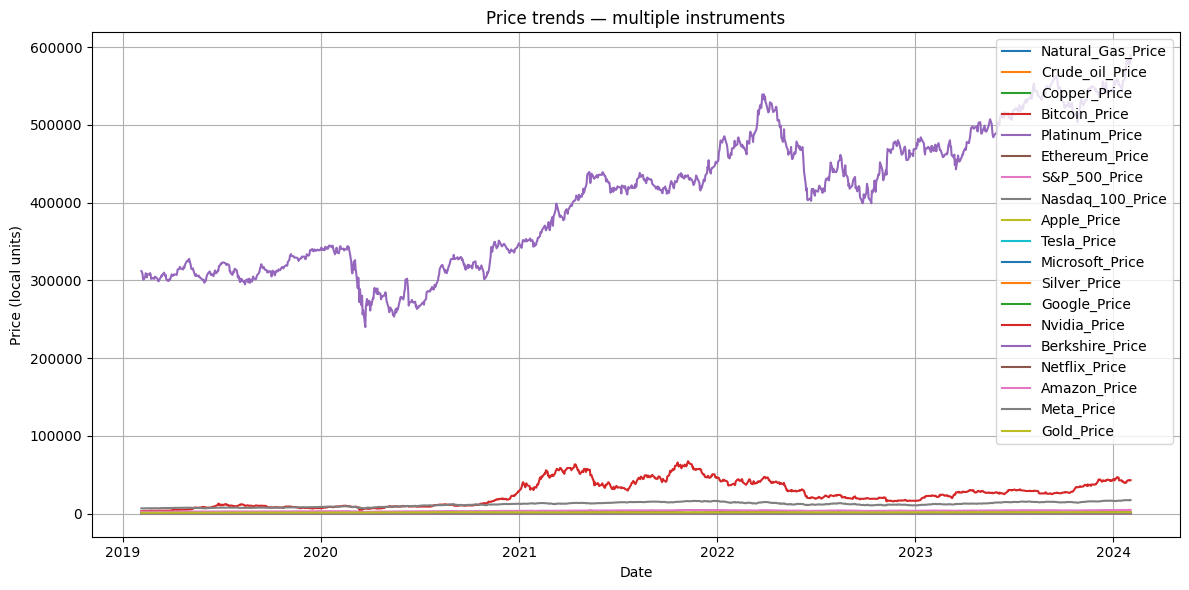

In [17]:
# Cell 4: Price trends (one plot with multiple lines)
plt.figure(figsize=(12,6))
for col in price_cols:
    plt.plot(market.index, market[col], label=col)
plt.title('Price trends — multiple instruments')
plt.xlabel('Date')
plt.ylabel('Price (local units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('price_trends.png')
plt.show()


In [18]:
# Cell 5: Individual price charts (generate a plot file per instrument)
os.makedirs('plots', exist_ok=True)
for col in price_cols:
    plt.figure(figsize=(10,4))
    plt.plot(market.index, market[col])
    plt.title(f'{col} price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    filename = f'plots/{col}_price.png'
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()
print("Saved individual price charts to plots/ folder.")


Saved individual price charts to plots/ folder.


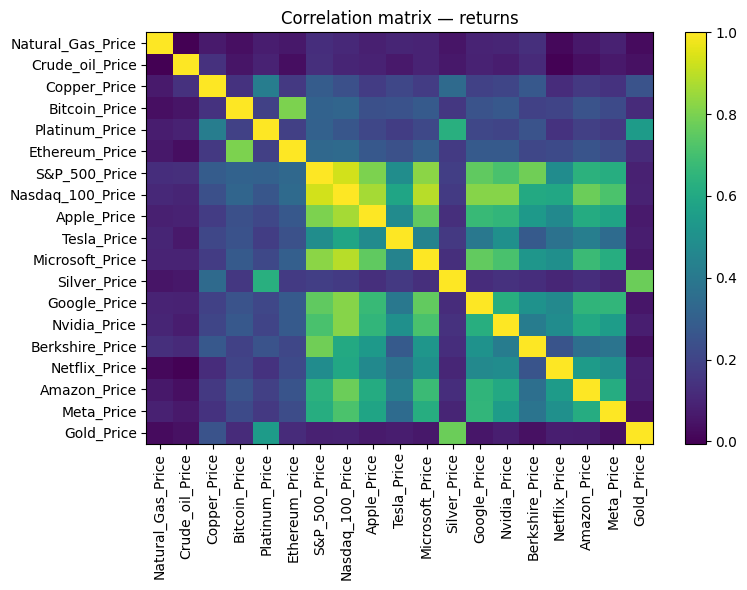

In [19]:
# Cell 6: Correlation heatmap of returns (matplotlib)
corr = returns.corr()
plt.figure(figsize=(8,6))
im = plt.imshow(corr.values, aspect='auto')
plt.colorbar(im)
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.title('Correlation matrix — returns')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


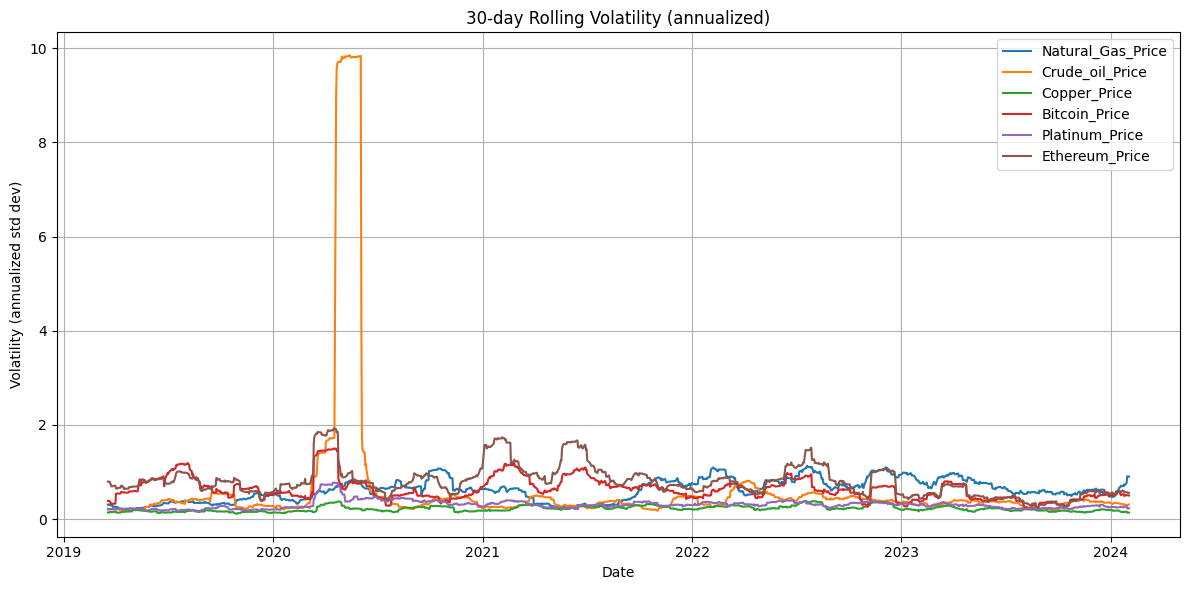

In [20]:
# Cell 7: Rolling volatility (30-day) for selected assets
window = 30
selected = price_cols[:6]  # first 6 instruments (edit as you want)
plt.figure(figsize=(12,6))
for col in selected:
    vol = returns[col].rolling(window).std() * np.sqrt(252)  # annualized volatility
    plt.plot(vol.index, vol, label=col)
plt.title(f'{window}-day Rolling Volatility (annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility (annualized std dev)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('rolling_volatility.png')
plt.show()


In [21]:
# Cell 8: Summary risk/return table for each instrument (annualized)
ann_return = returns.mean() * 252
ann_vol = returns.std() * np.sqrt(252)
sharpe = ann_return / ann_vol
summary = pd.DataFrame({
    'Annualized Return': ann_return,
    'Annualized Volatility': ann_vol,
    'Sharpe (rf=0)': sharpe
})
summary = summary.sort_values('Annualized Return', ascending=False)
summary.to_csv('risk_return_summary.csv')
summary


,Annualized Return,Annualized Volatility,Sharpe (rf=0)
Ethereum_Price,1.003285,0.866539,1.157807
Bitcoin_Price,0.747535,0.678644,1.101513
Nvidia_Price,0.714349,0.512575,1.393648
Tesla_Price,0.653516,0.644711,1.013657
Apple_Price,0.348636,0.318226,1.095558
Microsoft_Price,0.321683,0.303258,1.060757
Meta_Price,0.309804,0.445294,0.695730
Google_Price,0.236995,0.320664,0.739076
Nasdaq_100_Price,0.222019,0.257357,0.862688
Amazon_Price,0.212953,0.352458,0.604194


In [22]:
# -------------------
# Part II: Simple DCF helper functions (yfinance)
# -------------------

def fetch_financials(ticker):
    """
    Fetch annual financials via yfinance and return pandas DataFrames:
    - income_stmt: yearly revenue, EBIT, net income
    - bs: balance sheet
    - cf: cashflow
    """
    t = yf.Ticker(ticker)
    # yfinance returns quarterly/annual with columns as periods; transpose for easier use
    income = t.financials.T  # usually quarterly/annual -> transposed to rows=period
    balance = t.balance_sheet.T
    cashflow = t.cashflow.T
    info = t.info
    return income, balance, cashflow, info

def compute_historical_fcf(cashflow_df):
    """
    Compute simple Unlevered Free Cash Flow estimate:
    FCF = OperatingCashFlow - CapitalExpenditures
    Expects cashflow_df to have columns like 'Total Cash From Operating Activities' and 'Capital Expenditures'
    """
    # yfinance uses these keys; name may vary, check your DataFrame columns
    op_cf_keys = [c for c in cashflow_df.columns if 'Operating' in c or 'Operating Activities' in c or 'Total Cash From Operating Activities' in c]
    capex_keys = [c for c in cashflow_df.columns if 'Capital Expenditures' in c or 'Capital Expenditure' in c or 'Capital Expenditures' in c]
    # best effort: try standard column names
    # But we'll fallback to selecting likely columns by partial match
    rows = []
    for idx, row in cashflow_df.iterrows():
        # try common names
        op = None
        cap = None
        # direct keys
        for k in cashflow_df.columns:
            if 'Operating' in k and op is None:
                op = row[k]
            if 'Capital Expenditures' in k and cap is None:
                cap = row[k]
            if 'Capital Expenditure' in k and cap is None:
                cap = row[k]
        rows.append({'Date': idx, 'OperatingCF': op, 'CapEx': cap, 'FCF': (op - cap) if (op is not None and cap is not None) else np.nan})
    return pd.DataFrame(rows).set_index('Date')

def simple_dcf(ticker, forecast_years=5, wacc=0.08, g=0.02):
    """
    Builds a very simple DCF using:
    - historical FCF from yfinance cashflow
    - projects FCF forward by a historical CAGR of FCF (or fallback to revenue growth)
    - computes terminal value via perpetuity: FCF_last*(1+g)/(wacc-g)
    - discounts at wacc
    Returns a dict with numeric outputs and DataFrame of forecast.
    """
    income, bs, cf, info = fetch_financials(ticker)
    # compute historical FCF
    hist_fcf = compute_historical_fcf(cf)
    # find most recent non-null FCF values
    hist_fcf = hist_fcf.dropna(subset=['FCF'])
    if hist_fcf.shape[0] < 2:
        raise ValueError("Not enough historical FCF data available to estimate growth. Inspect cashflow DataFrame.")
    # estimate CAGR of FCF
    fcf_values = hist_fcf['FCF'].astype(float).values[::-1]  # reverse so chronological
    # compute CAGR across available periods:
    start = fcf_values[0]
    end = fcf_values[-1]
    n = len(fcf_values)-1
    if start <= 0 or end <= 0:
        # fallback to using revenue CAGR if FCF has negatives
        rev = income['TotalRevenue'] if 'TotalRevenue' in income.columns else income.iloc[:,0]
        rev = rev.dropna().astype(float).values[::-1]
        if len(rev) < 2:
            growth_rate = 0.05
        else:
            growth_rate = (rev[-1]/rev[0])**(1/(len(rev)-1)) - 1
    else:
        growth_rate = (end/start)**(1/n) - 1 if n > 0 else 0.05

    # set base FCF (most recent)
    base_fcf = float(hist_fcf['FCF'].dropna().iloc[-1])
    # create forecast
    years = list(range(1, forecast_years+1))
    fcf_forecast = []
    for y in years:
        fcf_forecast.append(base_fcf * ((1+growth_rate)**y))

    # terminal value (perpetuity)
    fcf_last = fcf_forecast[-1]
    terminal_value = fcf_last * (1+g) / (wacc - g)

    # discount factors and PVs
    pv_fcf = [fcf_forecast[i] / ((1+wacc)**(i+1)) for i in range(len(fcf_forecast))]
    pv_terminal = terminal_value / ((1+wacc)**(forecast_years))

    enterprise_value = sum(pv_fcf) + pv_terminal

    # attempt to get cash & debt to convert EV -> Equity
    cash = 0
    debt = 0
    try:
        # yfinance balance sheet columns might be named 'Cash' or 'CashAndCashEquivalents'
        bs_latest = bs.iloc[0]
        cash_keys = [k for k in bs.columns if 'Cash' in k]
        for k in cash_keys:
            cash = float(bs_latest[k]) if pd.notnull(bs_latest[k]) else cash
        # Debt: longTermDebt or ShortTermDebt
        debt_keys = [k for k in bs.columns if 'Debt' in k or 'Long Term Debt' in k or 'LongTermDebt' in k]
        for k in debt_keys:
            try:
                debt += float(bs_latest[k]) if pd.notnull(bs_latest[k]) else 0
            except Exception:
                pass
    except Exception:
        pass

    equity_value = enterprise_value + cash - debt
    per_share = None
    shares = None
    if 'sharesOutstanding' in info:
        shares = info.get('sharesOutstanding', None)
    if shares and shares > 0:
        per_share = equity_value / shares

    output = {
        'ticker': ticker,
        'base_fcf': base_fcf,
        'fcf_growth_used': growth_rate,
        'fcf_forecast': pd.Series(fcf_forecast, index=[f'Year {i}' for i in years]),
        'terminal_value': terminal_value,
        'enterprise_value': enterprise_value,
        'equity_value': equity_value,
        'per_share': per_share,
        'shares_outstanding': shares,
        'cash': cash,
        'debt': debt,
        'wacc': wacc,
        'g': g
    }
    return output


In [23]:
# Cell 9: Example run of DCF for Apple (AAPL)
# Note: you can change ticker to TSLA, AMZN, MSFT, etc.
try:
    ticker = 'AAPL'
    dcf_result = simple_dcf(ticker, forecast_years=5, wacc=0.085, g=0.02)
    print("DCF result summary for", ticker)
    print("Base FCF (most recent):", dcf_result['base_fcf'])
    print("FCF growth used:", dcf_result['fcf_growth_used'])
    print("Forecast FCF:\n", dcf_result['fcf_forecast'])
    print("Terminal value:", dcf_result['terminal_value'])
    print("Enterprise value:", dcf_result['enterprise_value'])
    print("Equity value:", dcf_result['equity_value'])
    print("Per share (implied):", dcf_result['per_share'])
except Exception as e:
    print("DCF error:", e)
    print("If yfinance data keys mismatch, you may need to inspect fetched DataFrames manually:")
    inc,b,cf,info = fetch_financials('AAPL')
    display(inc.head())
    display(b.head())
    display(cf.head())


DCF result summary for AAPL
Base FCF (most recent): 132859000000.0
FCF growth used: -0.022222493820970857
Forecast FCF:
 Year 1    1.299065e+11
Year 2    1.270197e+11
Year 3    1.241970e+11
Year 4    1.214370e+11
Year 5    1.187384e+11
dtype: float64
Terminal value: 1863279495466.1748
Enterprise value: 1730619689389.3662
Equity value: 1400192689389.3662
Per share (implied): 94.7590172885939


In [24]:
# Cell 10: Save a short analysis write-up automatically
with open('analysis_summary.txt', 'w') as f:
    f.write("Market analysis generated on: " + str(datetime.now()) + "\n\n")
    f.write("Detected price instruments: " + ", ".join(price_cols) + "\n\n")
    f.write("See charts: price_trends.png, correlation_heatmap.png, rolling_volatility.png\n")
    if 'dcf_result' in globals():
        f.write("\nDCF summary for " + dcf_result['ticker'] + ":\n")
        f.write(f"Per-share implied value: {dcf_result['per_share']}\n")
        f.write(f"Enterprise value: {dcf_result['enterprise_value']}\n")
        f.write(f"Shares outstanding: {dcf_result['shares_outstanding']}\n")
print("Wrote analysis_summary.txt")


Wrote analysis_summary.txt


Other:

1. Calculate Daily Returns
2. Plot trends of Bitcoin, Gold, Crude Oil, etc.
3. Build forecasting model
4. Build correlation heatmap

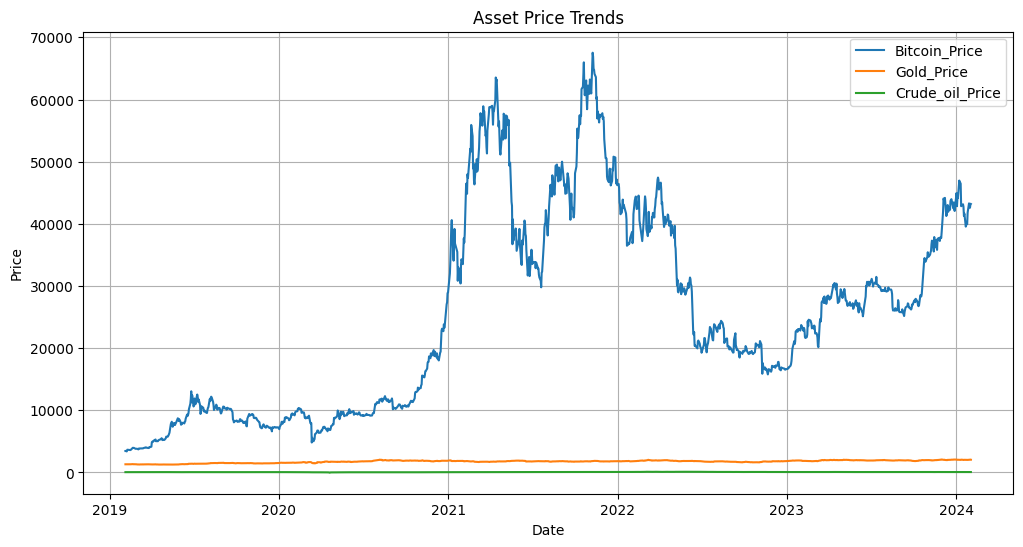

In [25]:
import matplotlib.pyplot as plt

assets_to_plot = ["Bitcoin_Price", "Gold_Price", "Crude_oil_Price"]

plt.figure(figsize=(12,6))

for asset in assets_to_plot:
    plt.plot(df['Date'], df[asset], label=asset)

plt.title("Asset Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Identify price columns (those ending with "_Price")
price_cols = [col for col in df.columns if "Price" in col]

# Calculate daily returns
for col in price_cols:
    df[col.replace("Price", "Return")] = df[col].pct_change()

df.head()


,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Tesla_Return,Microsoft_Return,Silver_Return,Google_Return,Nvidia_Return,Berkshire_Return,Netflix_Return,Amazon_Return,Meta_Return,Gold_Return
0,2019-02-04,2.660,116490.0,54.56,622470.0,2.7975,490.0,3462.8,503920.0,822.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-05,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950.0,821.35,...,0.026846,0.013997,-0.003147,0.009112,0.005094,-0.004167,0.012723,0.015550,0.011285,-0.000076
2,2019-02-06,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210.0,807.10,...,-0.012605,-0.011099,-0.008525,-0.025178,0.020272,-0.006083,-0.010174,-0.011213,-0.003914,-0.003639
3,2019-02-07,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360.0,800.80,...,-0.030733,-0.007168,0.000764,-0.014963,-0.036601,-0.019420,-0.021239,-0.015730,-0.024107,-0.000152
4,2019-02-08,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230.0,802.20,...,-0.005366,0.003800,0.006110,-0.003255,0.005156,-0.006743,0.008297,-0.016229,0.005710,0.003272


In [27]:
df['BTC_SMA_7'] = df['Bitcoin_Price'].rolling(7).mean()
df['BTC_SMA_30'] = df['Bitcoin_Price'].rolling(30).mean()


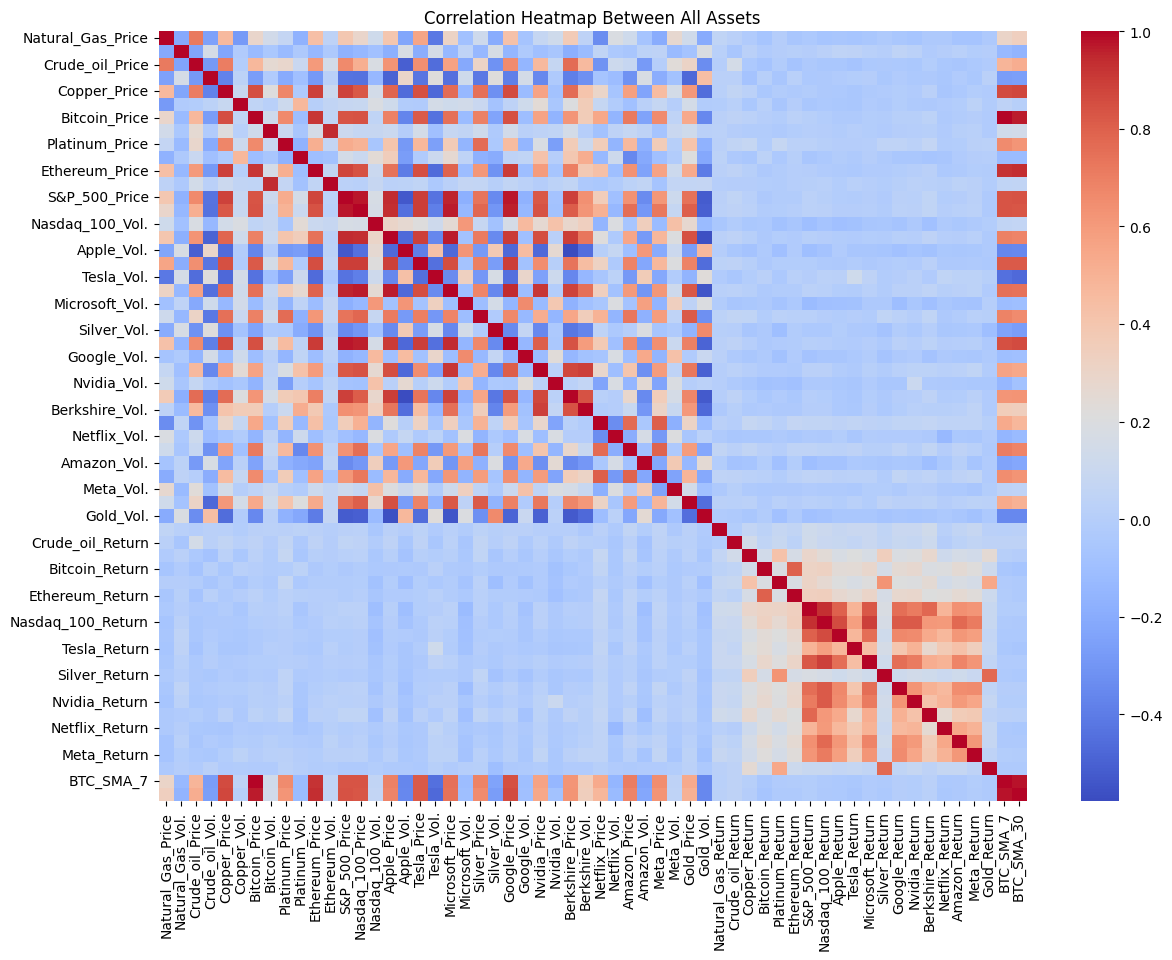

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap Between All Assets")
plt.show()
